# Quickstart of `tracee`

This notebook describes basic functions of `tracee`, which extracts linearly alined points in a three-dimensional space. A mock data table is prepared beforehand. Enter the `sample` directory and type `make`. Then, the sample data set will be generated in the directory.

First, we import required modules and the mock data table.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np
import tracee

The data table is provided in a plain text format with three columns; The first column is the x-position, the second columns is the y-position and the third column indicates the number of frames. The description of the data is given as a header.

In [2]:
filename = 'sample/mockdata_N006F030D500d00_b7e8.txt'
data = np.loadtxt(filename)
data

array([[153.011594, 285.58768 ,   0.      ],
       [202.482196, 439.333141,   0.      ],
       [202.998658, 341.72077 ,   0.      ],
       ...,
       [379.982589,  69.418742,  29.      ],
       [140.592629,  75.942366,  29.      ],
       [404.81868 , 138.54645 ,  29.      ]])

This data comprises 6 moving objects with 500 distractors. Make a 3D-scatter plot of the data. The following figure shows six sequences of linearly-aligned points and many distractors. Identifying six sequences from the point cloud is the problem in question.

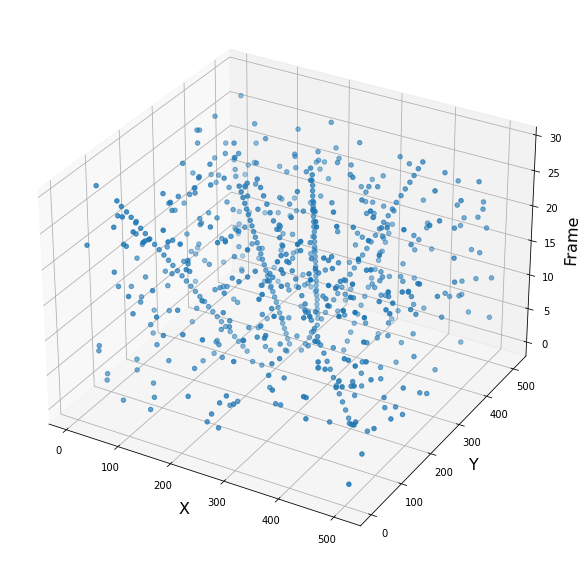

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('Frame', fontsize=16)
fig.tight_layout()
plt.show()

`tracee` has a few setting paraemters.

`tracee` construct a $k$-nearest neighbor graph. The number of neighbors $k$ is an obvious parameter. While a better recall may be provided with larger $k$, the process gets slow and more misidentifications will be provided. Setting $k=3$ is sufficient in general cases.

Then, linearly-aligned line segments are extracted by the Fast Directed Line Segment Grouping Method `fdlsgm` is used. `fdlsgm` requires a set of parameters. You can use `tracee.default_parameters()` to obtain a defualt parameter set. This function is directly adopted from the `fdlsgm` package. The default parameters are as follows.

In [4]:
param = tracee.default_parameters()
print(param)

## FDLSGM parameters:
#   Limit: 6
#   insert : (0.0524, 0.0524, 1.0, 3.0, 0)
#   update : (0.0524, 0.0524, 1.0, 3.0, 0)
#   merge  : (0.0524, 0.0524, 1.0, 3.0, 3)


Here, the number of frames is 30. We set `limit = 10`, the minimum number of points associated with a tracklet.

In [5]:
param.limit = 10
print(param)

## FDLSGM parameters:
#   Limit: 10
#   insert : (0.0524, 0.0524, 1.0, 3.0, 0)
#   update : (0.0524, 0.0524, 1.0, 3.0, 0)
#   merge  : (0.0524, 0.0524, 1.0, 3.0, 3)


Use `tracee.extract()` to identify tracklets. The arguments are as follows:

- `data`: ($N$, 3) array.
- `n_neighbor`: the number of neighbors.
- `max_velocity`: the maximum velocity in units of pix/frame.
- `param`: a `fdlsgm` parameter set.

The function returns a list of `Tracklet` instances. `tracee` successfully identified the six moving objects.

In [6]:
tracklet = tracee.extract(data, n_neighbor=3, max_velocity=200, param=param)
print(f'# {len(tracklet)} tracklets are extracted.')

# 6 tracklets are extracted.


The `Tracklet` instance has three members:

- `tail`: the starting point of the tracklet.
- `head`: the terminal point of the tracklet.
- `members`: the points associated with this tracklet.

In [7]:
tracklet[0]

Tracklet(tail=array([1.52664921e+02, 2.85716187e+02, 2.44469887e-02]), head=array([65.05886016, 37.94800264, 29.00152628]), members=array([[153.011594, 285.58768 ,   0.      ],
       [149.727916, 277.545932,   1.      ],
       [146.583488, 268.643559,   2.      ],
       [143.963956, 260.337611,   3.      ],
       [140.619552, 251.691676,   4.      ],
       [137.135721, 243.286801,   5.      ],
       [134.28501 , 234.655735,   6.      ],
       [131.648669, 225.937915,   7.      ],
       [128.390979, 217.543027,   8.      ],
       [125.554983, 208.882304,   9.      ],
       [122.979049, 200.769856,  10.      ],
       [119.602729, 191.91962 ,  11.      ],
       [116.658281, 183.171821,  12.      ],
       [113.462944, 174.762244,  13.      ],
       [110.250329, 166.292678,  14.      ],
       [107.232423, 158.02575 ,  15.      ],
       [104.447728, 148.944548,  16.      ],
       [101.156462, 140.858471,  17.      ],
       [ 98.506875, 132.137567,  18.      ],
       [ 95.5

Finally, we visualize the extracted tracklets. Generate a list of line segments and overlay on the previous scatter plot. The extracted line segments are illustrated by the thick red lines. The lines obviously traces the sequences of linearly-aligned points.

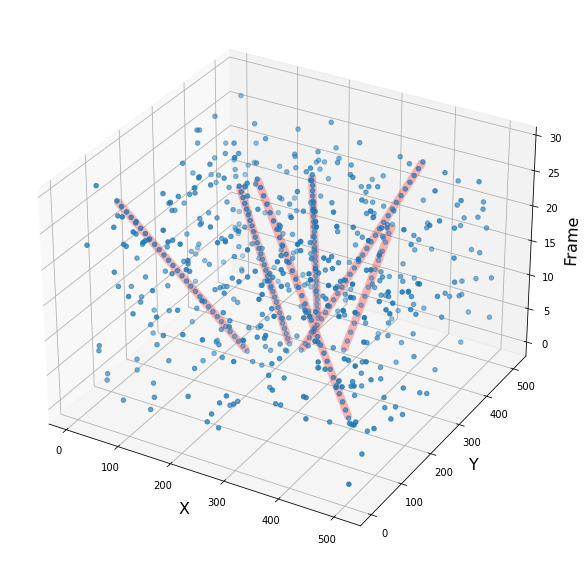

In [8]:
baseline = [(t.tail, t.head) for t in tracklet]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('Frame', fontsize=16)
ax.add_collection(Line3DCollection(baseline, color=(1.,.3,.3,.4), linewidth=8))
fig.tight_layout()
plt.show()